Plotting NetCDF snowmap data

In [19]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

Open NetCDF file

In [20]:
ds = xr.open_dataset('Example_PM_SSUM_25km_month02.nc')

Plot each layer

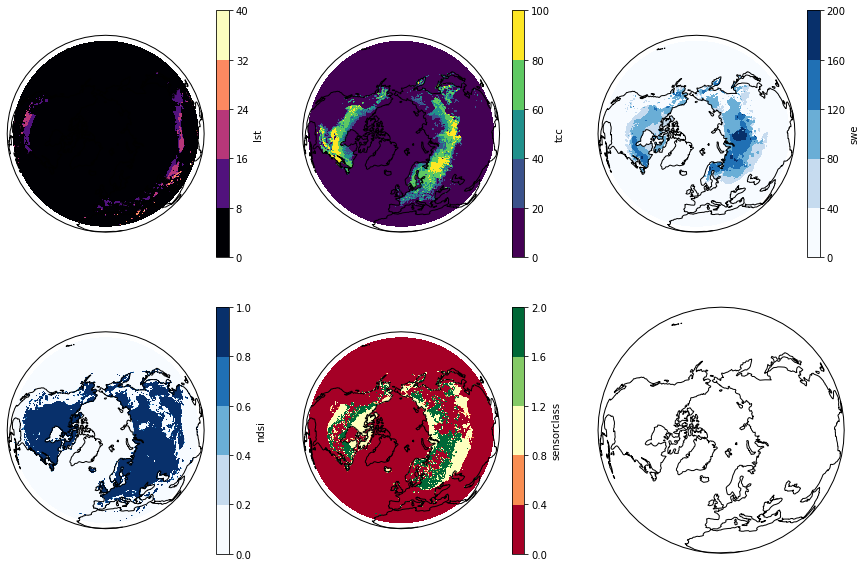

In [26]:
    
proj = ccrs.Orthographic(0, 90)
fig, ax = plt.subplots(2, 3, figsize=(15,10),subplot_kw=dict(projection=proj))
for a in ax.ravel():
    a.set_global();
    a.coastlines();

ds.lst.plot.contourf(ax=ax[0,0], transform=ccrs.PlateCarree(), cmap='magma');
ds.tcc.plot.contourf(ax=ax[0,1], transform=ccrs.PlateCarree(), cmap='viridis');
ds.swe.plot.contourf(ax=ax[0,2], transform=ccrs.PlateCarree(), cmap='Blues');
ds.ndsi.plot.contourf(ax=ax[1,0], transform=ccrs.PlateCarree(), cmap='Blues');
ds.sensorclass.plot.contourf(ax=ax[1,1], transform=ccrs.PlateCarree(), cmap='RdYlGn');
